In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
sns.set(style="whitegrid", palette="muted")


In [3]:
# Read CSV file (after downloading from Kaggle)
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

# View first few rows
print(df.head())

# Basic info
print(df.info())


                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   i

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [5]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


In [6]:
# Rename columns for easier access (optional)
df.columns = ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']

# View unique values
print("\nUnique fuel types:", df['fuel'].unique())
print("Unique seller types:", df['seller_type'].unique())
print("Unique transmission types:", df['transmission'].unique())



Unique fuel types: ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
Unique seller types: ['Individual' 'Dealer' 'Trustmark Dealer']
Unique transmission types: ['Manual' 'Automatic']


C:\Users\HP\AppData\Local\Temp\ipykernel_5860\1212249647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuel', data=df, palette='Set2')


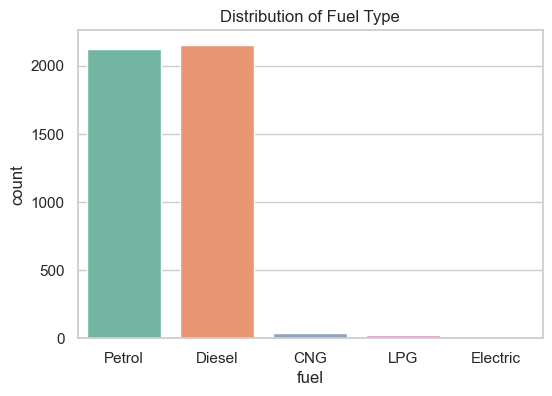

In [7]:
# 1️⃣ Cars by fuel type
plt.figure(figsize=(6,4))
sns.countplot(x='fuel', data=df, palette='Set2')
plt.title('Distribution of Fuel Type')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5860\3585396444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transmission', data=df, palette='cool')


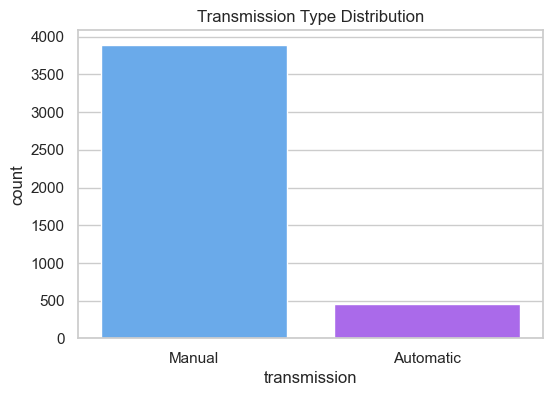

In [8]:
# 2️⃣ Cars by transmission type
plt.figure(figsize=(6,4))
sns.countplot(x='transmission', data=df, palette='cool')
plt.title('Transmission Type Distribution')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5860\2836418153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, order=sorted(df['year'].unique()), palette='viridis')


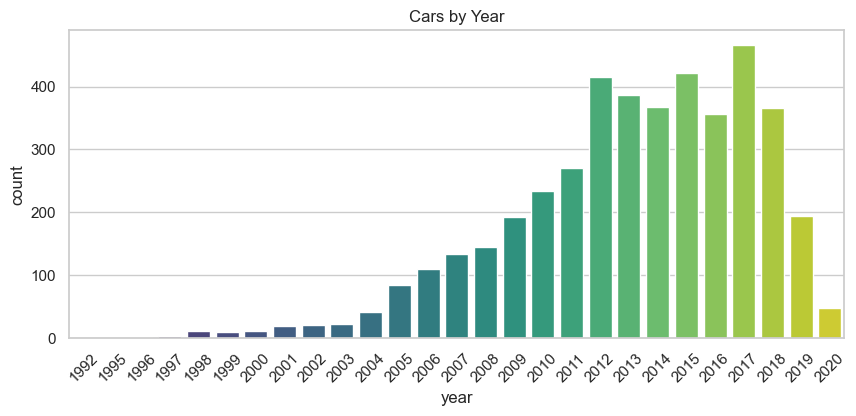

In [9]:
# 3️⃣ Year-wise car count
plt.figure(figsize=(10,4))
sns.countplot(x='year', data=df, order=sorted(df['year'].unique()), palette='viridis')
plt.title('Cars by Year')
plt.xticks(rotation=45)
plt.show()

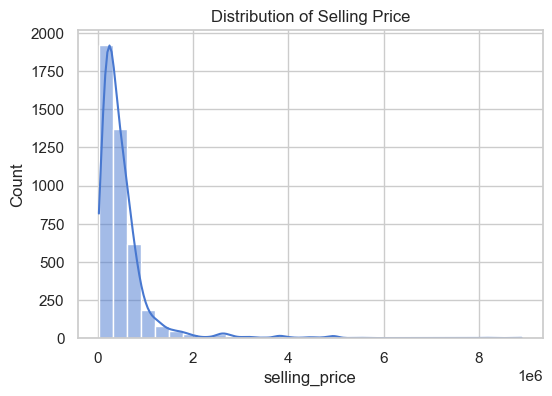

In [10]:
# 4️⃣ Selling price distribution
plt.figure(figsize=(6,4))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.show()

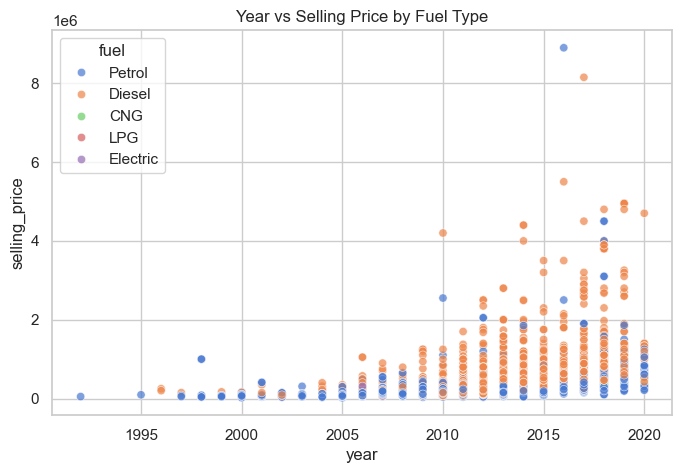

In [11]:
# 5️⃣ Relationship between year and selling price
plt.figure(figsize=(8,5))
sns.scatterplot(x='year', y='selling_price', data=df, hue='fuel', alpha=0.7)
plt.title('Year vs Selling Price by Fuel Type')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5860\3841393469.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values, y=top_models.index, palette='rocket')


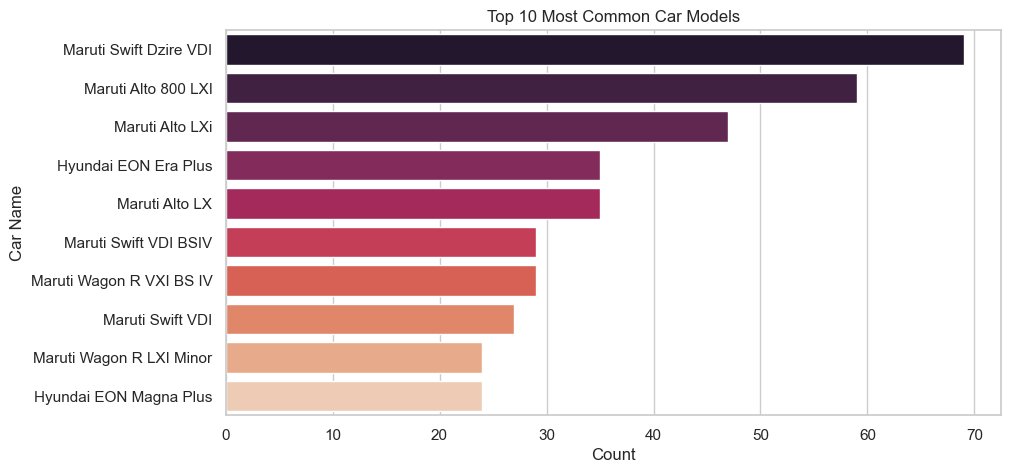

In [12]:
# 6️⃣ Top 10 car models
plt.figure(figsize=(10,5))
top_models = df['name'].value_counts().head(10)
sns.barplot(x=top_models.values, y=top_models.index, palette='rocket')
plt.title('Top 10 Most Common Car Models')
plt.xlabel('Count')
plt.ylabel('Car Name')
plt.show()

In [13]:
# Average selling price by fuel type
avg_price_by_fuel = df.groupby('fuel')['selling_price'].mean().sort_values(ascending=False)
print("\nAverage Selling Price by Fuel Type:")
print(avg_price_by_fuel)



Average Selling Price by Fuel Type:
fuel
Diesel      669094.252206
Petrol      344840.137541
Electric    310000.000000
CNG         277174.925000
LPG         167826.043478
Name: selling_price, dtype: float64


In [14]:
# Cars with more than 1 owner
multi_owner = df[df['owner'] != 'First Owner']
print(f"\nCars with multiple owners: {len(multi_owner)} out of {len(df)}")


Cars with multiple owners: 1508 out of 4340


In [15]:
# Average km driven per year
df['car_age'] = 2025 - df['year']
df['km_per_year'] = df['km_driven'] / df['car_age']
print("\nAverage km driven per year (first 10):")
print(df[['name', 'year', 'km_driven', 'car_age', 'km_per_year']].head(10))


Average km driven per year (first 10):
                        name  year  km_driven  car_age   km_per_year
0              Maruti 800 AC  2007      70000       18   3888.888889
1   Maruti Wagon R LXI Minor  2007      50000       18   2777.777778
2       Hyundai Verna 1.6 SX  2012     100000       13   7692.307692
3     Datsun RediGO T Option  2017      46000        8   5750.000000
4      Honda Amaze VX i-DTEC  2014     141000       11  12818.181818
5       Maruti Alto LX BSIII  2007     125000       18   6944.444444
6  Hyundai Xcent 1.2 Kappa S  2016      25000        9   2777.777778
7   Tata Indigo Grand Petrol  2014      60000       11   5454.545455
8   Hyundai Creta 1.6 VTVT S  2015      25000       10   2500.000000
9   Maruti Celerio Green VXI  2017      78000        8   9750.000000
